In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [ ]:
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

In [ ]:
train_data.categories_index

In [19]:
cat_list = [int(cat[1:5]) for cat in train_data.all_categories if "Animalia_Chordata_Mammalia" in cat]
cat_list
# get corresponding labels

[4613,
 4614,
 4615,
 4616,
 4617,
 4618,
 4619,
 4620,
 4621,
 4622,
 4623,
 4624,
 4625,
 4626,
 4627,
 4628,
 4629,
 4630,
 4631,
 4632,
 4633,
 4634,
 4635,
 4636,
 4637,
 4638,
 4639,
 4640,
 4641,
 4642,
 4643,
 4644,
 4645,
 4646,
 4647,
 4648,
 4649,
 4650,
 4651,
 4652,
 4653,
 4654,
 4655,
 4656,
 4657,
 4658,
 4659,
 4660,
 4661,
 4662,
 4663,
 4664,
 4665,
 4666,
 4667,
 4668,
 4669,
 4670,
 4671,
 4672,
 4673,
 4674,
 4675,
 4676,
 4677,
 4678,
 4679,
 4680,
 4681,
 4682,
 4683,
 4684,
 4685,
 4686,
 4687,
 4688,
 4689,
 4690,
 4691,
 4692,
 4693,
 4694,
 4695,
 4696,
 4697,
 4698,
 4699,
 4700,
 4701,
 4702,
 4703,
 4704,
 4705,
 4706,
 4707,
 4708,
 4709,
 4710,
 4711,
 4712,
 4713,
 4714,
 4715,
 4716,
 4717,
 4718,
 4719,
 4720,
 4721,
 4722,
 4723,
 4724,
 4725,
 4726,
 4727,
 4728,
 4729,
 4730,
 4731,
 4732,
 4733,
 4734,
 4735,
 4736,
 4737,
 4738,
 4739,
 4740,
 4741,
 4742,
 4743,
 4744,
 4745,
 4746,
 4747,
 4748,
 4749,
 4750,
 4751,
 4752,
 4753,
 4754,
 4755,

In [54]:
mammal_indices = []
for i, (_, label) in enumerate(train_data):
    print(i, label)
    if label > 4858:
        break
    if label >= 4613 and label <= 4858:
        mammal_indices.append(i)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
10 0
11 0
12 0
13 0
14 0
15 0
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0
31 0
32 0
33 0
34 0
35 0
36 0
37 0
38 0
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 0
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 1
92 1
93 1
94 1
95 1
96 1
97 1
98 1
99 1
100 2
101 2
102 2
103 2
104 2
105 2
106 2
107 2
108 2
109 2
110 2
111 2
112 2
113 2
114 2
115 2
116 2
117 2
118 2
119 2
120 2
121 2
122 2
123 2
124 2
125 2
126 2
127 2
128 2
129 2
130 2
131 2
132 2
133 2
134 2
135 2
136 2
137 2
138 2
139 2
140 2
141 2
142 2
143 2
144 2
145 2
146 2
147 2
148 2
149 2
150 3
151 3
152 3
153 3
154 3
155 3
156 3
157 3
158 3
159 3
160 3
161 3
162 3
163 3
164 3
165 3
166 3
167 3
168 3
169 3
170 3
171 3
172 3
173 3
174 3
175 3
176 3
177 3
178 3
179 3
180 3
181 3
182 3
183 3
184 3


In [55]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for CNNs
    transforms.RandomHorizontalFlip(),  # Data Augmentation
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Load datasets from disk with transforms applied
train_data = datasets.INaturalist(root='data/train_mini', version="2021_train_mini", transform=transform, download=False)
validation_data = datasets.INaturalist(root='data/validation', version="2021_valid", transform=transform, download=False)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(validation_data, batch_size=32, shuffle=False, num_workers=4)

print(f"Training samples: {len(train_data)}")
print(f"Validation samples: {len(validation_data)}")

Training samples: 500000
Validation samples: 100000


In [56]:
mammal_indices

[230650,
 230651,
 230652,
 230653,
 230654,
 230655,
 230656,
 230657,
 230658,
 230659,
 230660,
 230661,
 230662,
 230663,
 230664,
 230665,
 230666,
 230667,
 230668,
 230669,
 230670,
 230671,
 230672,
 230673,
 230674,
 230675,
 230676,
 230677,
 230678,
 230679,
 230680,
 230681,
 230682,
 230683,
 230684,
 230685,
 230686,
 230687,
 230688,
 230689,
 230690,
 230691,
 230692,
 230693,
 230694,
 230695,
 230696,
 230697,
 230698,
 230699,
 230700,
 230701,
 230702,
 230703,
 230704,
 230705,
 230706,
 230707,
 230708,
 230709,
 230710,
 230711,
 230712,
 230713,
 230714,
 230715,
 230716,
 230717,
 230718,
 230719,
 230720,
 230721,
 230722,
 230723,
 230724,
 230725,
 230726,
 230727,
 230728,
 230729,
 230730,
 230731,
 230732,
 230733,
 230734,
 230735,
 230736,
 230737,
 230738,
 230739,
 230740,
 230741,
 230742,
 230743,
 230744,
 230745,
 230746,
 230747,
 230748,
 230749,
 230750,
 230751,
 230752,
 230753,
 230754,
 230755,
 230756,
 230757,
 230758,
 230759,
 230760,
 

In [89]:
from torch.utils.data import Subset

# Find all indices where the target (label) corresponds to mammals
# Create a subset dataset containing only mammals
train_data_mammals = Subset(train_data, mammal_indices)

# Create a DataLoader for the filtered dataset
train_loader_mammals = DataLoader(train_data_mammals, batch_size=32, shuffle=True, num_workers=4)

#mammal_indices_val = [i for i, (_, label) in enumerate(validation_data) if label in cat_list]
#val_data_mammals = Subset(validation_data, mammal_indices_val)
#val_loader_mammals = DataLoader(val_data_mammals, batch_size=32, shuffle=False, num_workers=4)

print(f"Filtered train dataset contains {len(train_data_mammals)} mammal images.")
#print(f"Filtered val dataset contains {len(val_loader_mammals)} mammal images.")

Filtered train dataset contains 12300 mammal images.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


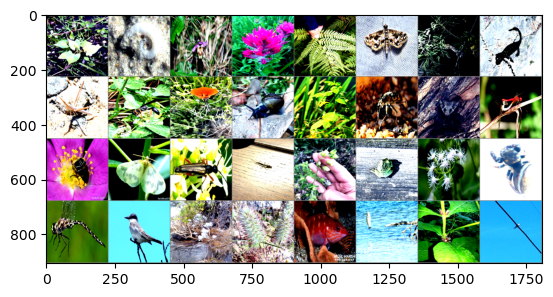

In [58]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(make_grid(images))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


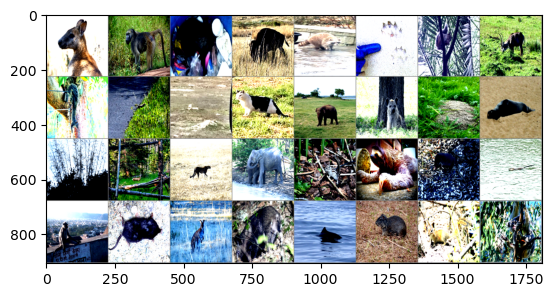

In [59]:
# get some random training images
dataiter = iter(train_loader_mammals)
images, labels = next(dataiter)

# show images
imshow(make_grid(images))

In [64]:
len(cat_list)

246

In [65]:
n_classes = len(cat_list)
n_classes

246

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


# Define a Simple CNN Model
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # Pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 56 * 56, 128)  # 32 channels, 56x56 image size after pooling
        self.fc2 = nn.Linear(128, num_classes)   # Output layer
        
        # Dropout to prevent overfitting
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv1 -> ReLU -> MaxPool
        x = self.pool(F.relu(self.conv2(x)))  # Conv2 -> ReLU -> MaxPool
        x = x.view(x.shape[0], -1)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  # Output layer
        return x

In [ ]:
simple_cnn = SimpleCNN(num_classes=n_classes).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(simple_cnn.parameters(), lr=0.001)


def remap_labels(labels):
    return (labels - 4613).long()  # Convert labels to tensor and ensure they are Long type


def train_model(model, train_loader, criterion, optimizer, epochs=5):
    model.train()  # Set to training mode

    train_n = len(train_loader)
    print(train_n)
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            labels = remap_labels(labels).to(device)
            print(labels)
            optimizer.zero_grad()  # Reset gradients
            outputs = model(images)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
            if i % 1000 == 0:
                print(f"{i} out of: {train_n}")

        # Print epoch stats
        print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f} - Accuracy: {100 * correct / total:.2f}%")

# Train the model
train_model(simple_cnn, train_loader_mammals, criterion, optimizer, epochs=5)

385
tensor([ 39,  89, 228,  41, 105,  68, 200, 242, 161,  55, 195,  76, 219,  99,
        194, 119,  90, 224, 119,  36, 229,  29, 210, 183, 149, 235,  54, 144,
        116, 199, 120, 119])


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
mammal_classes = [cat for cat in train_data.all_categories if "Animalia_Chordata_Mammalia" in cat]

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in mammal_classes}
total_pred = {classname: 0 for classname in mammal_classes}

# again no gradients needed
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = simple_cnn(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[mammal_classes[label]] += 1
            total_pred[mammal_classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 00000_Animalia_Annelida_Clitellata_Haplotaxida_Lumbricidae_Lumbricus_terrestris is 0.0 %
Accuracy for class: 00001_Animalia_Annelida_Polychaeta_Sabellida_Sabellidae_Sabella_spallanzanii is 0.0 %
Accuracy for class: 00002_Animalia_Annelida_Polychaeta_Sabellida_Serpulidae_Serpula_columbiana is 0.0 %
Accuracy for class: 00003_Animalia_Annelida_Polychaeta_Sabellida_Serpulidae_Spirobranchus_cariniferus is 0.0 %
Accuracy for class: 00004_Animalia_Arthropoda_Arachnida_Araneae_Agelenidae_Eratigena_duellica is 0.0 %
Accuracy for class: 00005_Animalia_Arthropoda_Arachnida_Araneae_Antrodiaetidae_Atypoides_riversi is 0.0 %
Accuracy for class: 00006_Animalia_Arthropoda_Arachnida_Araneae_Araneidae_Aculepeira_ceropegia is 0.0 %
Accuracy for class: 00007_Animalia_Arthropoda_Arachnida_Araneae_Araneidae_Agalenatea_redii is 0.0 %
Accuracy for class: 00008_Animalia_Arthropoda_Arachnida_Araneae_Araneidae_Araneus_bicentenarius is 0.0 %
Accuracy for class: 00009_Animalia_Arthropoda_Arachn